<a href="https://colab.research.google.com/github/Pranjita1/legendary-system-Visualization-Projects/blob/master/Immigration_vs_business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Immigration data visualization and finding link of immigration to local venues (businesses) coming up in a locality

This data visualization project aims to generate correlations between immigration trends (historical) to businesses coming up in an area. The importance of this work lies in policy planning and service preparations because whenever a business comes up, it raises a lot of economical needs on the society as a whole. If we can understand a linked trend, then we can pre-prepare as a whole as to which types of avenues might come up. 

This study lacks in the fact that only available foursquare data has been utilised. Also, we are studying one specific locality. This needs to be cross-verified across cities and if a similar trend is identified, then we can confirm that immigration trends are indicators of what type of enterprises will come up in a locality

In [0]:
import pandas as pd # primary data structure library
import numpy as np  # useful for many scientific computing in Python

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

After loading the data - which is Canadian immigration data from 1980 to 2013, we see if any null objects are there. Finding none, we move on

In [5]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
#dropping columns not necessary for analysis
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [7]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [0]:
#now we change the index to country. This is done for easier calling of data

df_can.set_index('Country', inplace = True)

In [10]:
df_can.head(5)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [0]:
#Keeping in mind the economic recession in 2008, we also make two sub-groups:

past = df_can[[1980, 1981, 1982, 1983, 1984, 1985]]
after_recession = df_can[[ 2008, 2009, 2010, 2011, 2012, 2013]]

In [13]:
past.head(2)

,1980,1981,1982,1983,1984,1985
Country,,,,,,
Afghanistan,16,39,39,47,71,340
Albania,1,0,0,0,0,0


In [14]:
after_recession.head(2)

,2008,2009,2010,2011,2012,2013
Country,,,,,,
Afghanistan,2111,1746,1758,2203,2635,2004
Albania,560,716,561,539,620,603


In [15]:
print(past.loc['India'])

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
1985    4211
Name: India, dtype: int64


In [16]:
print(after_recession.loc['India'])

2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: int64


In [17]:
df_can.columns = list(map(str, df_can.columns))
[print (type(x)) for x in df_can.columns.values]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [0]:
past.columns = list(map(str, past.columns))

In [0]:
after_recession.columns = list(map(str, after_recession.columns))

In [18]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [19]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print ('Matplotlib version: ', mpl.__version__)

print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

Matplotlib version:  3.2.1
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


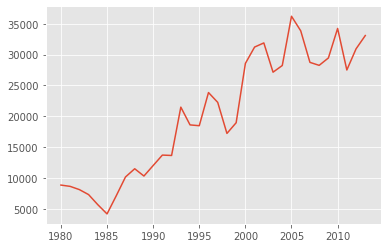

In [21]:
India = df_can.loc['India', years] # passing in years 1980 - 2013 to exclude the 'total' column
India.plot()

In [22]:
years_before = list(map(str, range(1980, 1986)))
years_before

['1980', '1981', '1982', '1983', '1984', '1985']

In [27]:
years_after = list(map(str, range(2008, 2014)))
years_after

['2008', '2009', '2010', '2011', '2012', '2013']

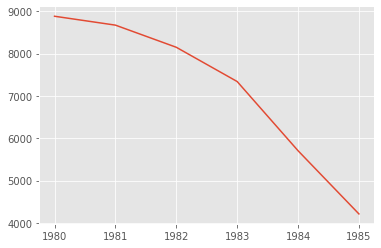

In [26]:
India_before = past.loc['India', years_before]
India_before.plot()

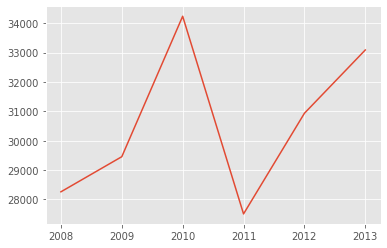

In [29]:
India_after = after_recession.loc['India', years_after]
India_after.plot()

Seeing these graphs, digging historic events leads to: Canada suffering from Swine flu pandemic 2009-10, which might be a cause of decline in immigration.

!980s were also the period when Canada saw several major transportation disasters killing many.

Now, let's see the graph of another extremely populated country - China.

In [30]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [31]:
df_CI = df_CI.transpose()
df_CI.head(2)

Country,India,China
1980,8880,5123
1981,8670,6682


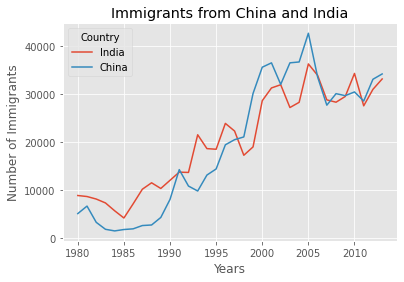

In [32]:
#transpose is taken for plotting correctly.

df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')



plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


They look almost similar in their trend line.

So, we also inspect past and after recession chart for China.

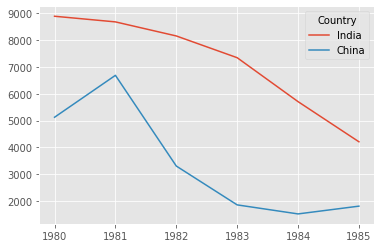

In [34]:
past_CI = past.loc[['India', 'China'],years_before]
past_CI = past_CI.transpose()
past_CI.plot()

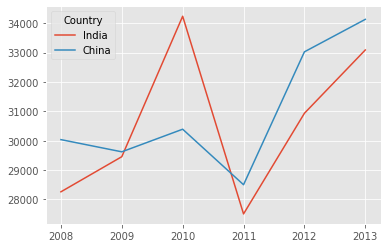

In [35]:
after_recession_ci = after_recession.loc[['India', 'China'],years_after]
after_recession_ci = after_recession_ci.transpose()
after_recession_ci.plot()



Now we look into top 5 countries having emigrants to Canada

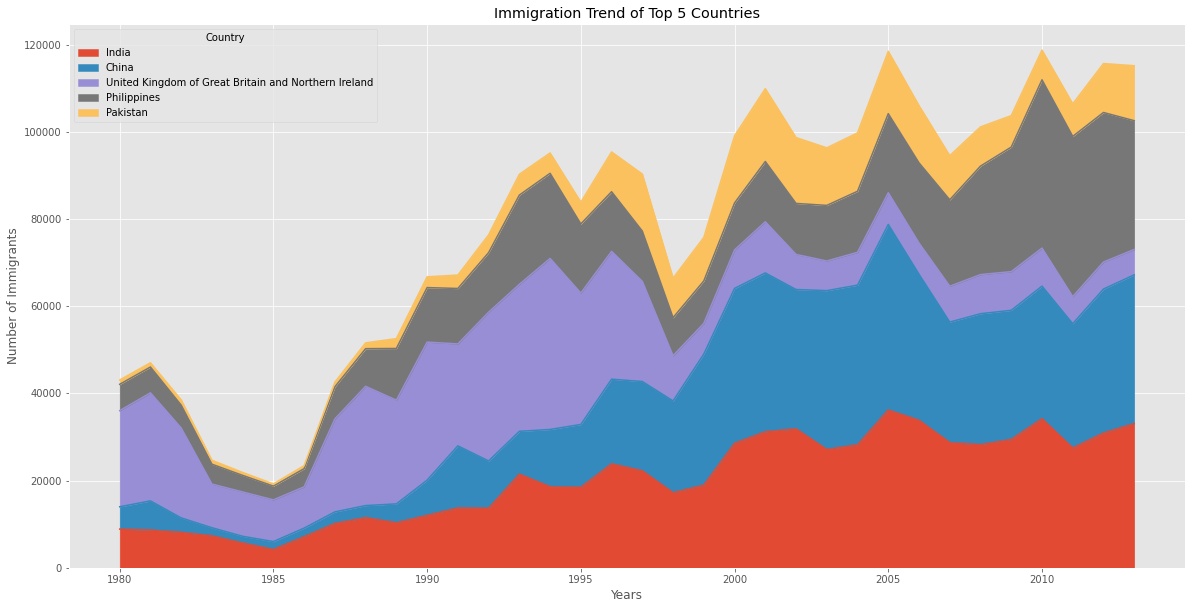

In [36]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=True,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In case this area plot looks confusing, let's inspect a barchart:

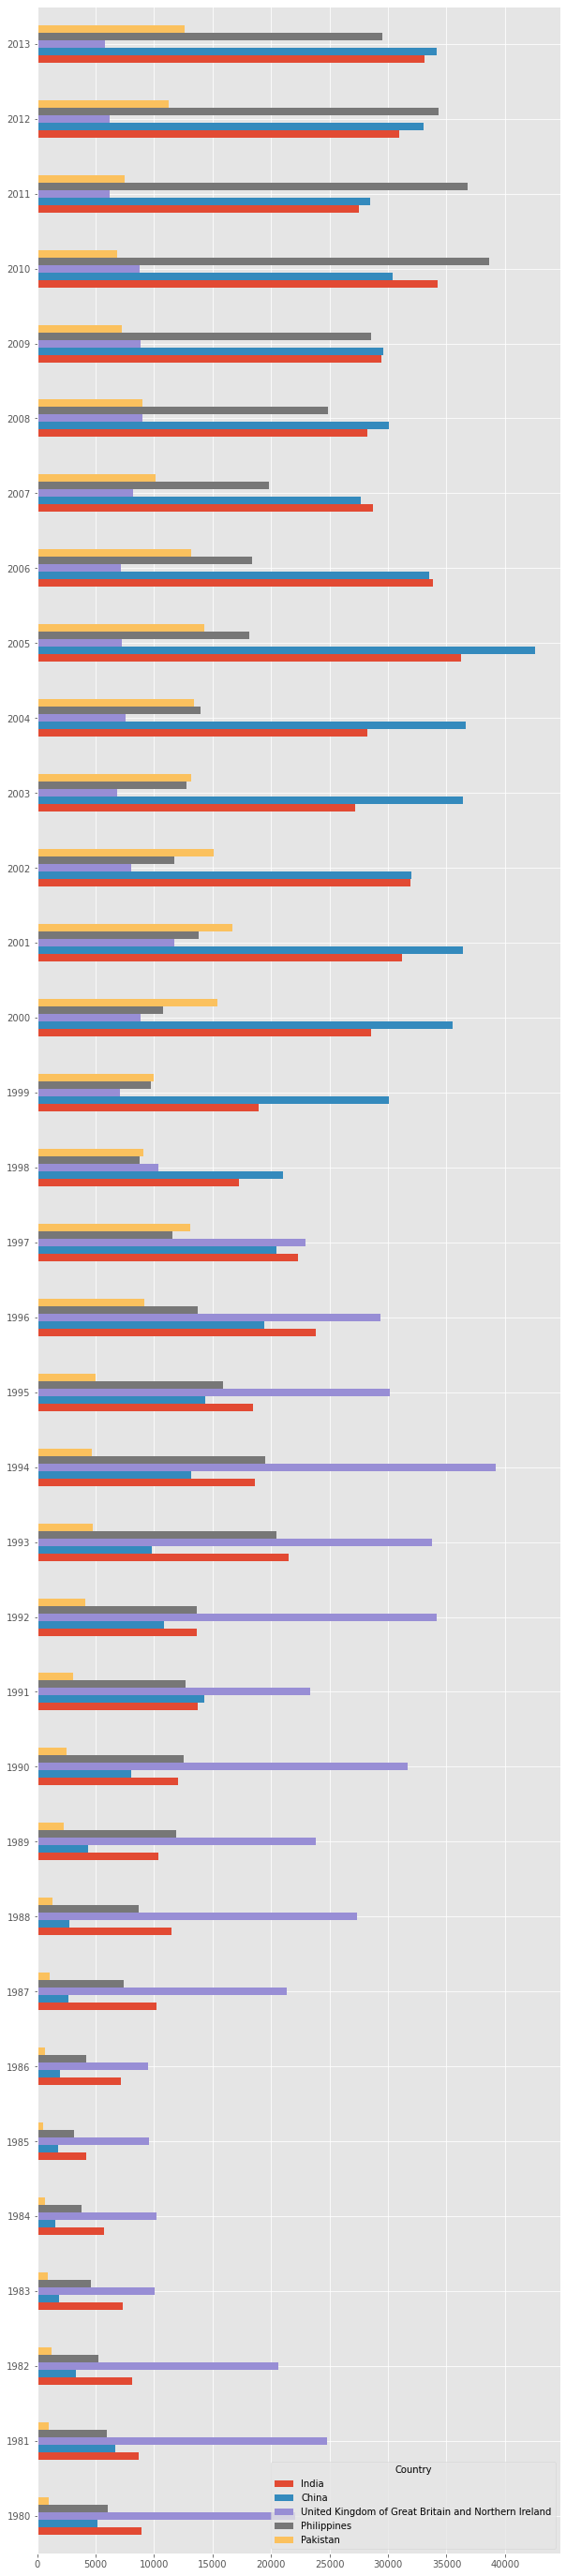

In [50]:
df_top5.plot(kind = 'barh', figsize = (10,50))

Here, we see Philippines increasing. Lets see more:

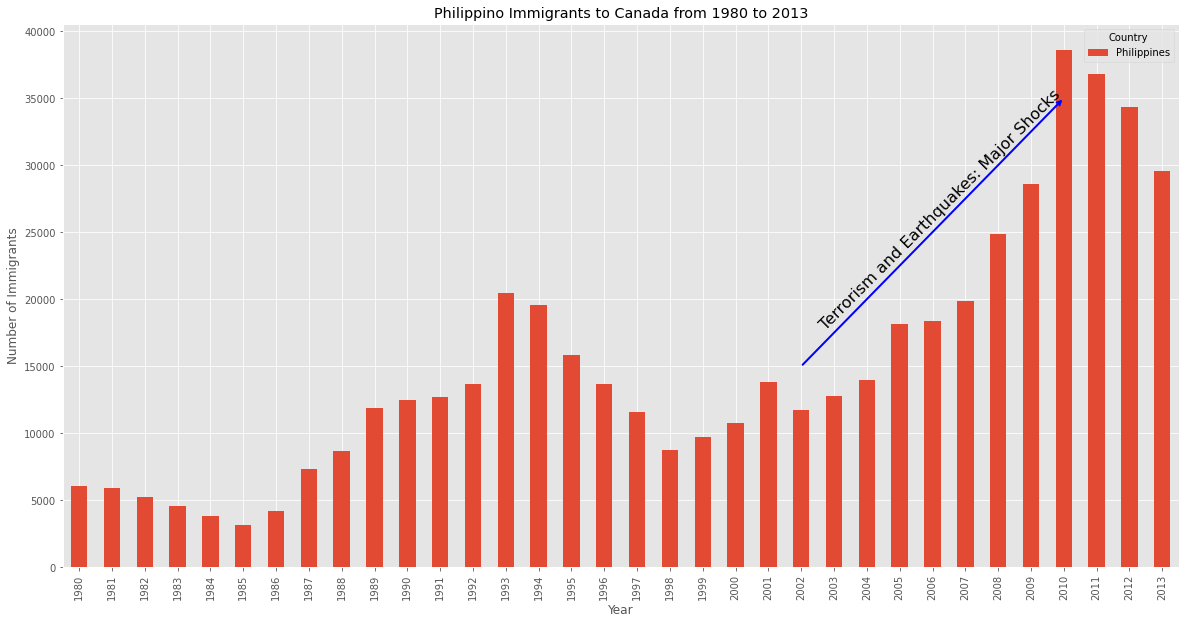

In [69]:
Philipines = df_can.loc[['Philippines'], years]
Philipines = Philipines.transpose()
Philipines.plot(kind = 'bar', figsize = (20,10), rot = 90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Philippino Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(30, 35000),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(22, 15000),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Terrorism and Earthquakes: Major Shocks', # text to display
             xy=(22.5,17500),                    # start the text at at point (year 2008 , pop 30)
             rotation=45,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                     # want the text to be horizontally 'left' algned.
             fontsize = 16
            )

plt.show()

As an Indian, and Asian living in a foreign country, I find myself missing food often, so, let's see top asian country immigrants to Canada

In [73]:
condition = df_can['Continent'] == 'Asia'
Asia = df_can[condition]
Asia.sort_values(['Total'], ascending=False, axis=0, inplace=True)

Asia_top20 = Asia.head(20)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
Asia_top20['Total']

Country
India                         691904
China                         659962
Philippines                   511391
Pakistan                      241600
Iran (Islamic Republic of)    175923
Sri Lanka                     148358
Republic of Korea             142581
Lebanon                       115359
Viet Nam                       97146
Iraq                           69789
Israel                         66508
Bangladesh                     65568
Afghanistan                    58639
Jordan                         35406
Turkey                         31781
Syrian Arab Republic           31485
Japan                          27707
Malaysia                       24417
Singapore                      14579
Indonesia                      13150
Name: Total, dtype: int64

Next, for our analysis, we focus on a city of Canada - Toronto.

We will try to figure out some information about it's boroughs and popular hotspots.

In [75]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Scanning through web, this page in wikipedia has relevant data. So we scrape the table containing information about boroughs. As for now, we eliminate those rows having no information as we will not obtain any further details about them in later processing.



In [76]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

resp_wiki = requests.get(wiki_url)

wiki_page = resp_wiki.text

print(wiki_page)


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"652df336-7a6c-4f10-8854-52123f8436fb","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario-rela

we see that the desired output is under table tag with class wikitable sortable

In [78]:
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df
import pandas as pd


soup = BeautifulSoup(wiki_page, 'html.parser')
table = soup.find('table',{'class':'wikitable sortable'})

toronto = table.find_all('tr')
data = []
for row in toronto:
    td=[]
    for t in row.find_all('td'):
        td.append(t.text.strip())
    data.append(td)
df = pd.DataFrame(data, columns=['PostalCode', 'Borough', 'Neighborhood'])

df = df[~df['Borough'].isnull()]  # to filter out bad rows
df.drop(df[df.Borough == 'Not assigned'].index, inplace=True)
df.reset_index(drop=True, inplace=True)

df.head(4)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"


In [79]:
df.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
dtype: int64

In [80]:
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

geo_df=pd.read_csv('http://cocl.us/Geospatial_data')

geo_df.rename(columns={'Postal Code':'PostalCode'},inplace=True)
geo_merged = pd.merge(geo_df, df, on='PostalCode')

geo_data=geo_merged[['PostalCode','Borough','Neighborhood','Latitude','Longitude']]
geo_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


We choose to Focus on Scarborough and it's vicinity. The reason is Scarborough began developing around the time immigrants started flocking to Canada and it is a popular destination with immigrants

In [81]:
#Using foursquare API to explore Bronx neighborhood

CLIENT_ID = '3YLZKBAUQC3SOPYSSMEAEUGT3A44SKJNZK5AFD1TPUB1O5PG' # your Foursquare ID
CLIENT_SECRET = 'J1HMTIDUZ5ACSZU0G4KD0M3CSDN10DQ2GO43O3XBJF4UAASM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3YLZKBAUQC3SOPYSSMEAEUGT3A44SKJNZK5AFD1TPUB1O5PG
CLIENT_SECRET:J1HMTIDUZ5ACSZU0G4KD0M3CSDN10DQ2GO43O3XBJF4UAASM


In [82]:
scarbo = geo_data[geo_data['Borough'].str.contains("Scarborough")]
scarbo.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [0]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [84]:
scarbo_venues = getNearbyVenues(names=scarbo['Neighborhood'],
                                   latitudes=scarbo['Latitude'],
                                   longitudes=scarbo['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


In [85]:
scarbo_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


In [87]:
# one hot encoding
s_onehot = pd.get_dummies(scarbo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
s_onehot['Neighborhood'] = scarbo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [s_onehot.columns[-1]] + list(s_onehot.columns[:-1])
s_onehot = s_onehot[fixed_columns]

s_onehot.head(2)

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Bubble Tea Shop,Bus Line,Bus Station,Café,Camera Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Convenience Store,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,General Entertainment,Grocery Store,Hakka Restaurant,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Sandwich Place,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Thrift / Vintage Store,Vietnamese Restaurant
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
s_grouped = s_onehot.groupby('Neighborhood').mean().reset_index()
s_grouped.head(3)

,Neighborhood,American Restaurant,Athletics & Sports,Bakery,Bank,Bar,Breakfast Spot,Bubble Tea Shop,Bus Line,Bus Station,Café,Camera Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Convenience Store,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,General Entertainment,Grocery Store,Hakka Restaurant,Hobby Shop,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Sandwich Place,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Thrift / Vintage Store,Vietnamese Restaurant
0,Agincourt,0.0,0.000,0.000,0.000,0.0,0.2,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.0,0.0,0.000,0.0,0.0
1,"Birch Cliff, Cliffside West",0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.25,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000,0.0,0.0
2,Cedarbrae,0.0,0.125,0.125,0.125,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.125,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.125,0.00,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.125,0.0,0.0


Top - 5 in each neighborhood:

In [89]:
num_top_venues = 5

for hood in s_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = s_grouped[s_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1             Breakfast Spot   0.2
2                     Lounge   0.2
3               Skating Rink   0.2
4             Clothing Store   0.2


----Birch Cliff, Cliffside West----
                   venue  freq
0  General Entertainment  0.25
1           Skating Rink  0.25
2                   Café  0.25
3        College Stadium  0.25
4    American Restaurant  0.00


----Cedarbrae----
                  venue  freq
0      Hakka Restaurant  0.12
1  Caribbean Restaurant  0.12
2                Bakery  0.12
3                  Bank  0.12
4       Thai Restaurant  0.12


----Clarks Corners, Tam O'Shanter, Sullivan----
               venue  freq
0        Pizza Place  0.15
1           Pharmacy  0.15
2        Gas Station  0.08
3       Noodle House  0.08
4  Convenience Store  0.08


----Cliffside, Cliffcrest, Scarborough Village West----
                 venue  freq
0  American Restaurant  0.33
1         Intersecti

In [90]:
import numpy as np


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = s_grouped['Neighborhood']

for ind in np.arange(s_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(s_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(3)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Breakfast Spot,Latin American Restaurant,Lounge,Clothing Store,Vietnamese Restaurant,Coffee Shop,Gas Station,Furniture / Home Store,Fried Chicken Joint
1,"Birch Cliff, Cliffside West",General Entertainment,Skating Rink,Café,College Stadium,Vietnamese Restaurant,Clothing Store,Gas Station,Furniture / Home Store,Fried Chicken Joint,Fast Food Restaurant
2,Cedarbrae,Thai Restaurant,Athletics & Sports,Bakery,Bank,Gas Station,Hakka Restaurant,Fried Chicken Joint,Caribbean Restaurant,Vietnamese Restaurant,Discount Store


Ok, now let's compare:

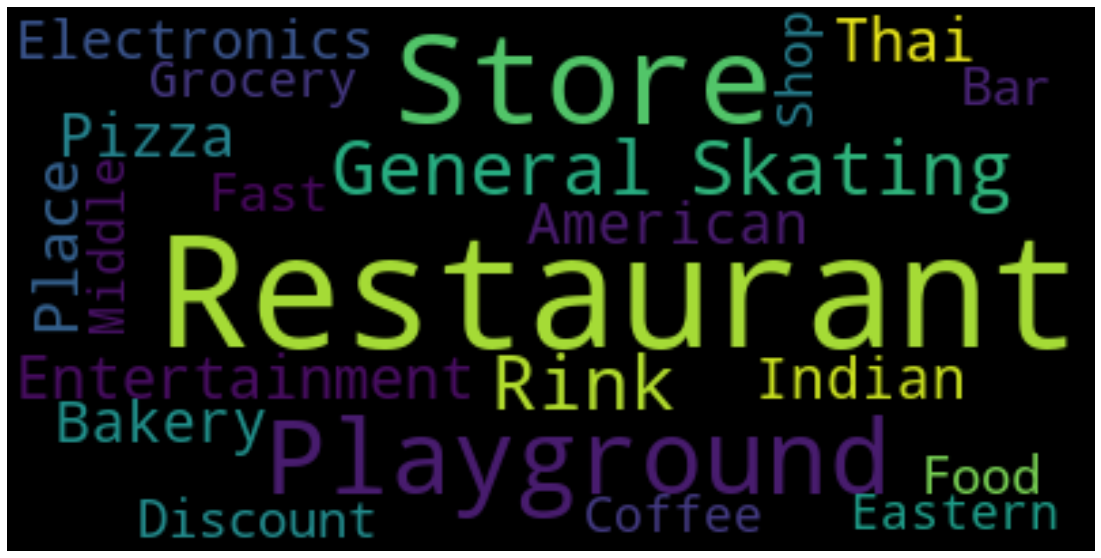

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

text = " ".join(venue for venue in neighborhoods_venues_sorted['1st Most Common Venue'])
wordcloud = WordCloud(max_words=100, background_color="black").generate(text)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's compare it with the Asian dataset of top 20. We see that Food is a common avenue of business and several words like Thai, Indian, Eastern etc indicate that immigration trends and necessity to consume local food does pave way for like-enterprises to come up. Also these are good ways to socialize with people of same community

Let's now see for all common venues.

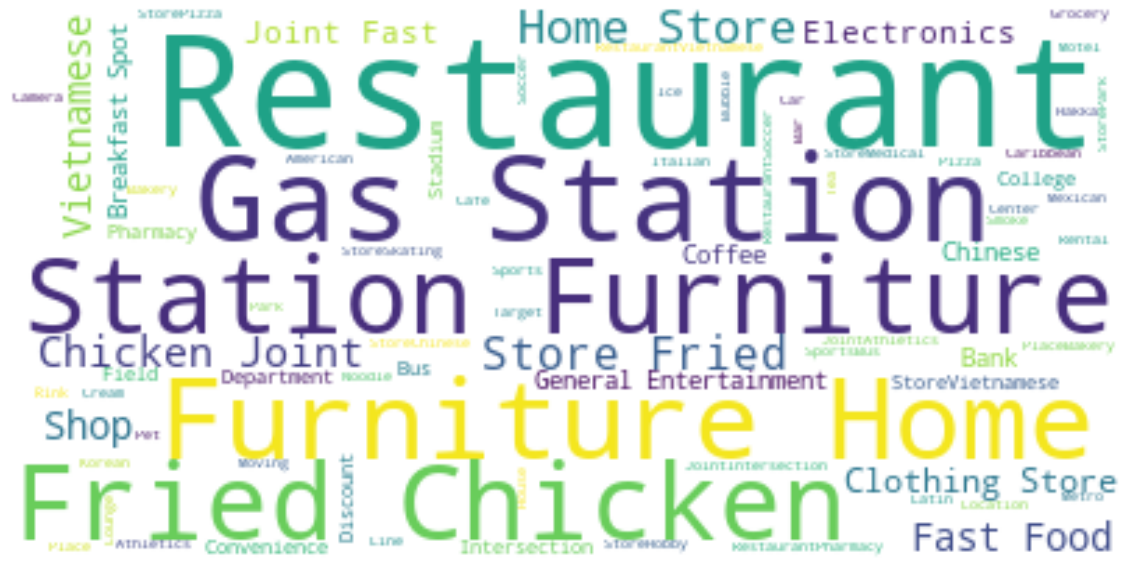

In [94]:
common = neighborhoods_venues_sorted.iloc[:,1:10]

popular = []
for row in range(0,len(common.index)):
    popular.append(' '.join(str(x) for x in common.iloc[row,1:10]))

wordcloud = WordCloud(max_words=100, background_color="white").generate("".join(popular))

# Display the generated image:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

When immigrants come in, they look for a space to live and often move about the city. Notably, Furniture, Gas station, Home are top in the lists. 

This indicates that if immigration trends of an area is studied, we can predict the kinds of businesses that might come up in an area.

Also, how the services are given is a crucial aspect. Both the wordclouds have the word: Discount. When immigrants come in, often they do not have currency of same strength. Discounts do help local businesses to be appealing to them as well.

Thus studying immigration trends we find a correlation between economic activities of an area to the kind of people living there. 